In [1]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
setwd("~/project-gandalm/isoform_twas/sLDSC/")

### SCZ, mixed top eQTL

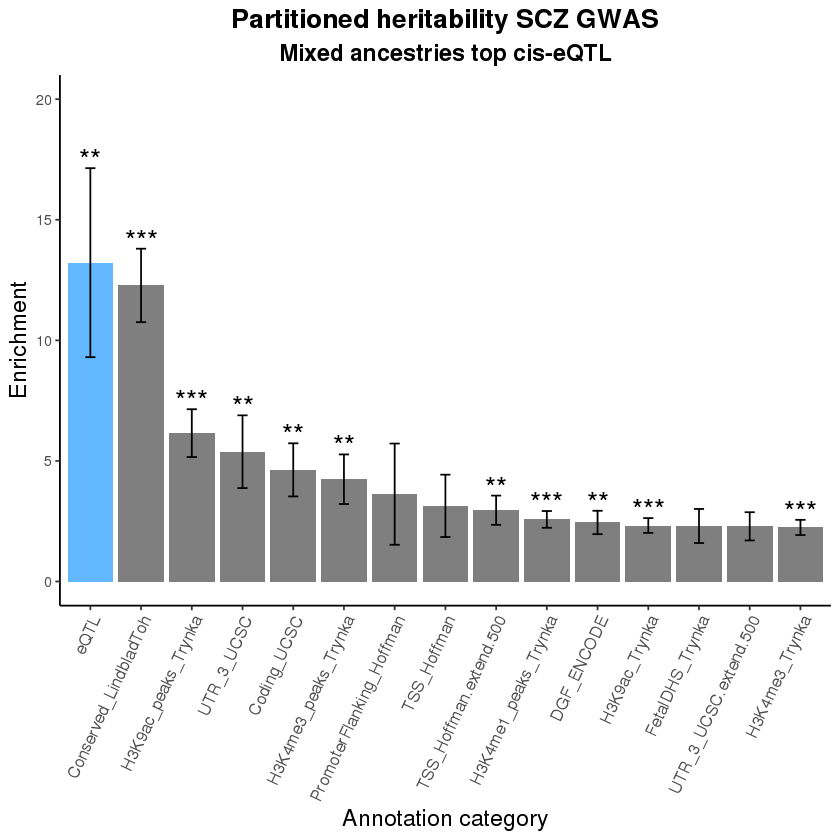

In [8]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Mixed ancestries top cis-eQTL") +
  xlab("Annotation category") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

In [10]:
ggsave("figures/SCZ.Clozuk.2018_mixed_top_eqtl.png", p, height = 6, width = 6)

### More GWAS, mixed top eQTL
Now omitting bonferroni correction and significance level. Need to calculate that within each trait.

In [7]:
setwd("./results/")
results <- list.files(pattern = "*_mixed_top_eqtl.results")

In [12]:
results

[1] "ALZ.Jansen.2019_mixed_top_eqtl.results"               
[2] "ASD.iPSYCHPGC.2018_mixed_top_eqtl.results"            
[3] "BD.PGC3_mixed_top_eqtl.results"                       
[4] "EduYears.SSGAC.Lee2018_mixed_top_eqtl.results"        
[5] "Insomnia.Jansen.2018_mixed_top_eqtl.results"          
[6] "Intelligence.SavageNatGen.2018_mixed_top_eqtl.results"
[7] "MDD.PGC.2018_mixed_top_eqtl.results"                  
[8] "SCZ.Clozuk.2018_mixed_top_eqtl.results"

In [19]:
strsplit(results[1], split="_")[[1]][1]

[1] "ALZ.Jansen.2019"

In [20]:
for (i in 1:length(results)) {
    file_name <- strsplit(results[i], split = "_")[[1]][1]
    file_df <- read.table(results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

In [21]:
ls()

[1] "ALZ.Jansen.2019"                "ASD.iPSYCHPGC.2018"            
 [3] "BD.PGC3"                        "EduYears.SSGAC.Lee2018"        
 [5] "file_df"                        "file_name"                     
 [7] "i"                              "Insomnia.Jansen.2018"          
 [9] "Intelligence.SavageNatGen.2018" "MDD.PGC.2018"                  
[11] "myfiles"                        "results"                       
[13] "SCZ.Clozuk.2018"                "trait"                         
[15] "traits"

In [28]:
df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
df <- df %>% filter(Category == "L2_1")
df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")

In [29]:
df

Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,Trait
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
L2_1,0.002999584,0.01578311,0.082270743,5.261766,27.427380,0.8896232304,1.247765e-09,5.516238e-08,0.02261985,ALZ.Jansen.2019
L2_1,0.002999584,0.02742948,0.026950328,9.144425,8.984687,0.3619978424,2.302563e-07,2.609979e-07,0.88221520,ASD.iPSYCHPGC.2018
L2_1,0.002999584,0.01356646,0.015168311,4.522781,5.056804,0.4860475974,2.800624e-08,5.291421e-08,0.52927633,BD.PGC3
L2_1,0.002999584,0.03083254,0.007876888,10.278937,2.625993,0.0005039176,1.544343e-07,4.486393e-08,3.44228277,EduYears.SSGAC.Lee2018
L2_1,0.002999584,0.02612940,0.015321874,8.711007,5.107999,0.1352008033,4.889490e-08,3.555285e-08,1.37527380,Insomnia.Jansen.2018
L2_1,0.002999584,0.03008507,0.012714436,10.029745,4.238732,0.0343044414,2.438536e-07,1.216811e-07,2.00403824,Intelligence.SavageNatGen.2018
L2_1,0.002999584,0.01330874,0.018576135,4.436860,6.192903,0.5807367638,3.097151e-08,6.431031e-08,0.48159474,MDD.PGC.2018
L2_1,0.002999584,0.03965666,0.011754549,13.220717,3.918726,0.0022177811,7.348389e-07,2.459089e-07,2.98825688,SCZ.Clozuk.2018


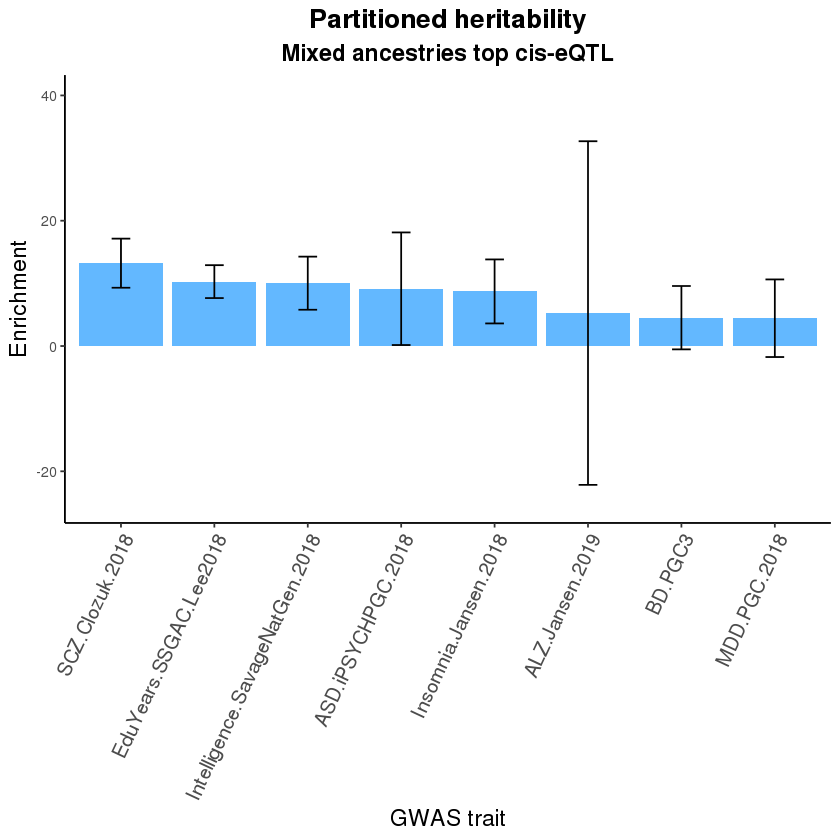

In [82]:
p1 <- ggplot(df, aes(x=reorder(Trait, -Enrichment), y=Enrichment)) +
  geom_bar(stat = "identity", width = .9, fill="steelblue1") +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  ggtitle("Partitioned heritability", subtitle = "Mixed ancestries top cis-eQTL") +
  xlab("GWAS trait") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=12),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(-25,40)
#   scale_fill_brewer(palette="Set1")
#   scale_fill_manual(values = wes_palette(n=8, name="Moonrise3", type="continuous"))
p1

In [86]:
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/enrichment_mixed_top_eqtl.png", p1, width = 6, height = 6)

### SCZ, mixed top isoQTL per isoGene (???)

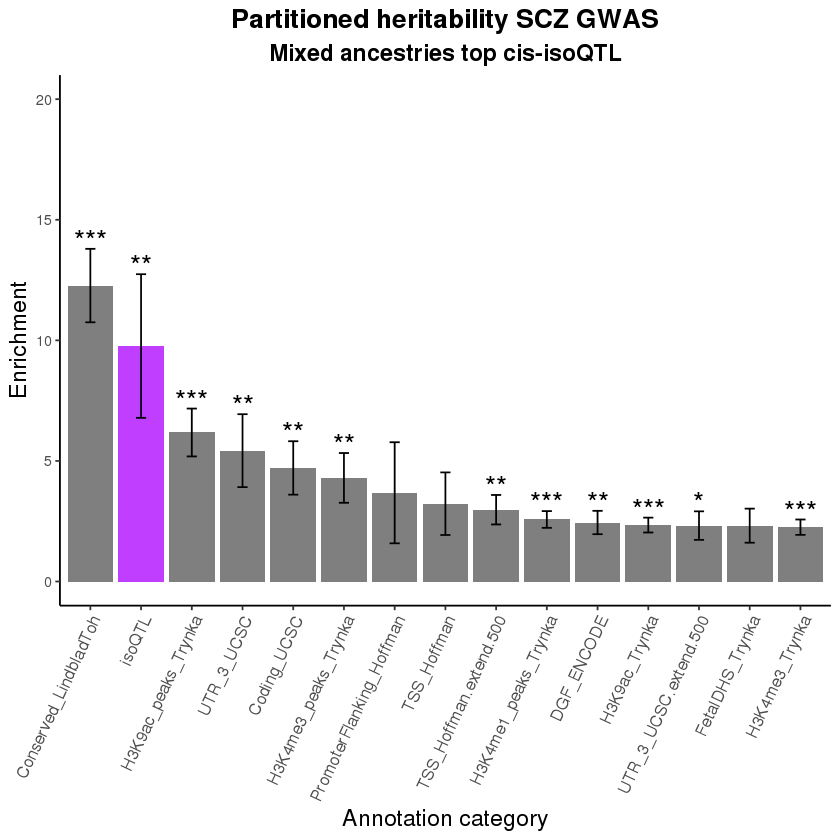

In [9]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Mixed ancestries top cis-isoQTL") +
  xlab("Annotation category") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

In [10]:
ggsave("figures/SCZ.Clozuk.2018_mixed_top_isoqtl.png", p, height = 6, width = 6)

### More GWAS, top isoQTL

In [4]:
setwd("./results/")
results <- list.files(pattern = "*_mixed_top_isoqtl.results")

In [5]:
for (i in 1:length(results)) {
    file_name <- strsplit(results[i], split = "_")[[1]][1]
    file_df <- read.table(results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
df <- df %>% filter(Category == "L2_1")
df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")

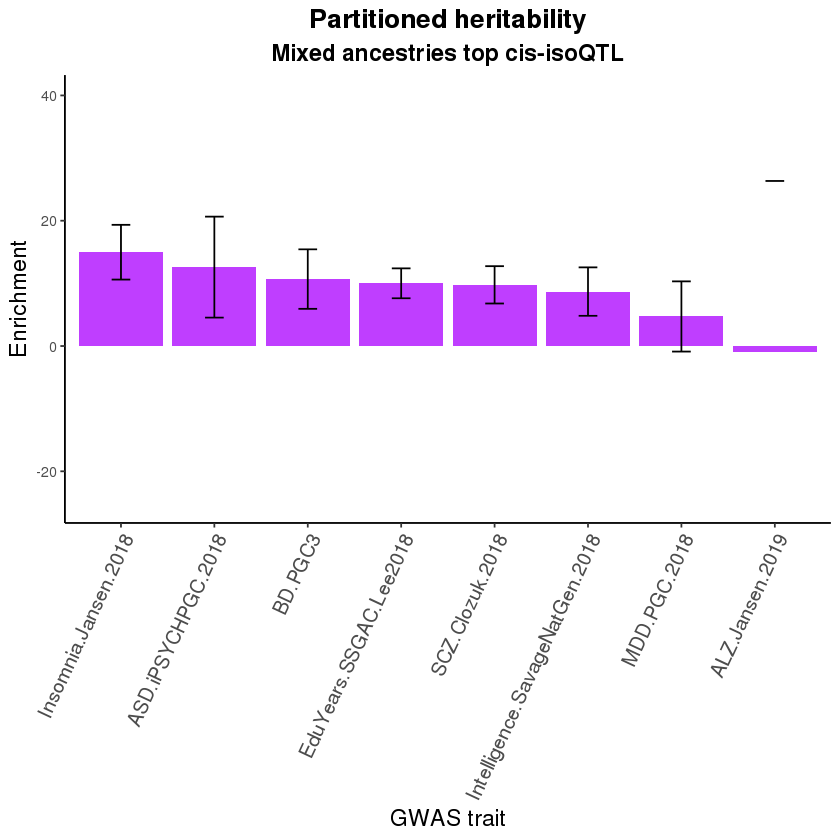

In [11]:
p1 <- ggplot(df, aes(x=reorder(Trait, -Enrichment), y=Enrichment)) +
  geom_bar(stat = "identity", width = .9, fill="darkorchid1") +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  ggtitle("Partitioned heritability", subtitle = "Mixed ancestries top cis-isoQTL") +
  xlab("GWAS trait") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=12),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(-25,40)
#   scale_fill_brewer(palette="Set1")
#   scale_fill_manual(values = wes_palette(n=8, name="Moonrise3", type="continuous"))
p1

In [12]:
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/enrichment_mixed_top_isoqtl.png", p1, width = 6, height = 6)